A rede neural que construímos no capítulo anterior possui, até o momento, uma única camada. Redes neurais se tornam *profundas* quando possui duas ou mais **camadas ocultas**. Até o momento temos apenas uma camada, que é a camada de saída. O motivo de termos duas ou mais **camadas ocultas** será mostrado ao longo do capítulo. Atualmente, não possuímos nenhuma camada oculta. Uma camada oculta não é uma camada de entrada ou saída; como cientista, você analisa informa os dados na entrada e obtém os resultados na saída. Camadas entre esses dois pontos possuem valores que não lidamos necessariamente, por isso o nome *oculto*. Não deixe que esse nome informe que não possamos acessar esses valores. Você frequentemente os analisará para melhorar a sua rede neural. Para explorar esse conceito, vamos adicionar outra camada nessa rede neural, e, por agora, vamos assumir que essas duas camadas serão camadas ocultas, e ainda não codificamos a nossa camada de saída ainda.

Antes de de adicionar outra camada, vamos pensar no que estamos fazendo. No caso da primeira camada, podemos ver que temos quatro entradas:

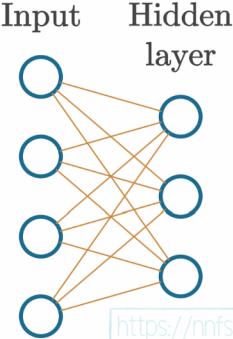

***Figura 3.1***: A camada de entrada possui quatro entradas e a camadas oculta possui três neurônios.

Amostras (conjunto de features) são sempre informadas à entrada, que não muda em nada a nossa primeira camada oculta, onde podemos ver que haverá três conjuntos de pesos com quatro valores de entrada cada neurônio.

Cada um desses três conjuntos de pesos está associado com um neurônio. Logo, como temos três conjuntos de pesos, temos três neurônios na nossa primeira camada oculta. Cada neurônio recebe um único conjunto de pesos junto com quatro entradas, resultando no peso inicial com o shape (3, 4).

Agora desejamos adicionar uma nova camada. Para isso, devemos ter certeza de que a entrada da próxima camada combine com a saída da camada anterior. Devemos configura o número de neurônios em uma camada por quantos conjuntos de pesos e biases nos temos. A influência da camada anterior no conjuntos de pesos para a camada atual é que cada conjunto de pesos necessita ter um peso separado por entrada. Isso indica que há um peso por neurônio da camada anterior (ou de uma feature se falarmos da camada de entrada). A camada anterior possui três pesos e três biases, então sabemos que serão três neurônios na camada seguinte. Isso quer dizer, que para a camada seguinte, podemos ter quantos conjuntos de pesos quisermos, mas cada um desses conjuntos deverão ter apenas três pesos.

Para criar uma nova camada, vamos criar alguns conjuntos de entrada, pesos e biases:

In [1]:
# Conjuntos da camada de entrada
entradas = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# Conjunto de pesos da primeira camada
pesos_1 = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

# Conjunto de biases da primeira camada
biases_1 = [2, 3, 0.5]

# Conjunto de pesos da segunda camada
pesos_2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]

# Conjunto de biases da segunda camada
biases_2 = [-1, 2, -0.5]

Depois, vamos chamar a saída de *saida_camada_1*:

In [2]:
saida_camada_1 = np.dot(entradas, np.array(pesos_1).T) + biases_1

NameError: name 'np' is not defined

Como vimos anteriormente, a camada de entrada são os daod sque usaremos para treinar o modelo ou a saída da camada anterior. Por conta disso, é que definimos duas versões de *pesos* e *biases* mas apenas uma *entrada*, uma vez que a entrada da segunda camada é a saída da camada anterior:

In [3]:
saida_camada_2 = np.dot(saida_camada_1, np.array(pesos_2).T) + biases_2

NameError: name 'np' is not defined

Juntando tudo temos:

In [4]:
# Importar a bilioteca
import numpy as np

# Conjuntos da camada de entrada
entradas = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# Conjunto de pesos da primeira camada
pesos_1 = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

# Conjunto de biases da primeira camada
biases_1 = [2, 3, 0.5]

# Conjunto de pesos da segunda camada
pesos_2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]

# Conjunto de biases da segunda camada
biases_2 = [-1, 2, -0.5]

# Saída da primeira camada
saida_camada_1 = np.dot(entradas, np.array(pesos_1).T) + biases_1

# Saída da segunda camada
saida_camada_2 = np.dot(saida_camada_1, np.array(pesos_2).T) + biases_2

# Mostrar o resultado
print(saida_camada_2)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


Até esse ponto, a nossa rede neural pode ser representada visualmente de seguinte forma:

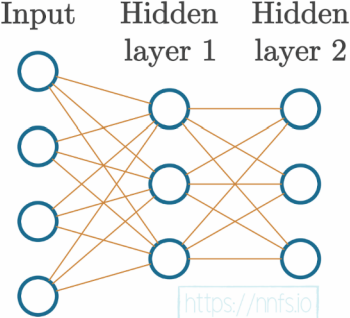

***Figura 3.2***: Quatro entradas com duas camadas ocultas e três neurônios cada.

# Dados de Treino

Agora, para não ficarmos criando dados aleatórios (demora e cansa fazer isso), usaemos uma função que pode criar dados não lineares. Mas o que é um dado não linear? Dados lineares podem ser representados como uma linha:

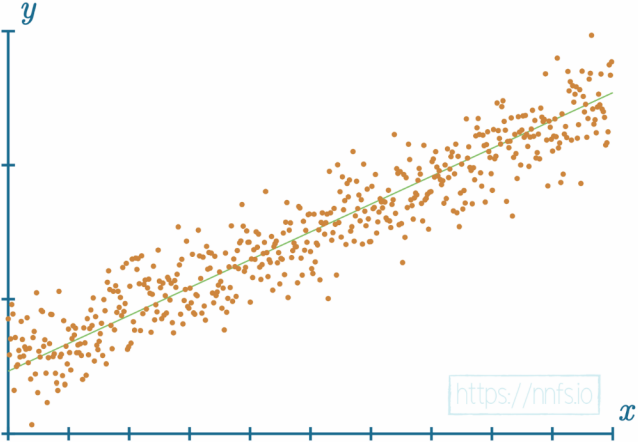

***Figura 3.3***: Exemplo de dados (pontos laranja) que podem ser representados por uma linha (linha verde).

Dados não lineares não podem ser bem representados em uma linha:

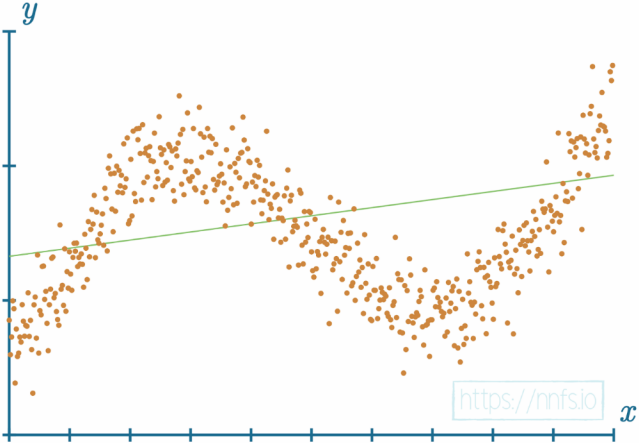

***Figura 3.4***: Exemplo de dados (pontos laranjas) que não são bem representados por uma linha (linha verde).

Se você fosse representar os pontos dos dados como *(x, y)*, onde *y=f(x)* e olhar para a linha com tendência ou inclinaçã clara, provavelmente você está com um conjunto de dados linear! Dados lineares são fáceis de aproximação pela maioria dos modelos de aprendizado de máquina, em relação às redes neurais. Modelos de aprendizado de máquina não conseguem realizar aproximações em conjunto de dados não lineares. Para simplificar tudo isso, vamos baixar um módulo chamado `nnfs`:

```
pip install nnfs
```

O pacote `nnfs` contém as funções que usaremos para criar os dados. Por exemplo:

In [1]:
from nnfs.datasets import spiral_data

A função **spiral_data** foi ligeiramente modificada [dessa função](https://cs231n.github.io/neural-networks-case-study/), caso tenha interesse de verificar.

Você geralmente não treinará sua rede neural com dados aleatórios, você certamente terá um conjunto de dados correto para o treino. Gerar um conjunto de dados aleatório para questões acadêmicas é conveniente nessa etapa do estudo:

In [4]:
# Importar as bibliotecas
import nnfs
import numpy as np

# Inicial o nnfs
nnfs.init()

A função **nnfs.init()** faz três coisas:
1. Configura a seed para randomização em 0;

2. Cria um dtype *float32* e;

3. Substitui o produto escalar original do `NumPy`.

A função **spiral_data()** nos permite criar um conjunto de dados com quantas classes quisermos. A função possui parâmetros para escolher o número de classes e a quantidade de pontos/obsevações por classe em um conjunto de dados não linear. Por exemplo:

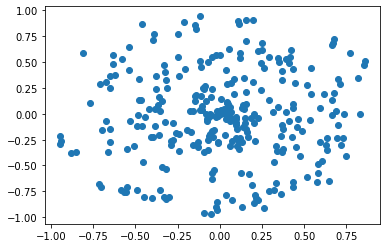

In [4]:
# Importar a biblioteca
import matplotlib.pyplot as plt

# Gerar os dados
X, y = spiral_data(samples=100, classes=3)

# Criar o gráfico
plt.scatter(X[:, 0], X[:, 1])

# Mostrar o gráfico
plt.show()

Se você observar o centro, é possível determinar as três classes separadamente, porém é um grande problema para o aprendizado de máquina de classificar esses dados. Adicionando cor aos pontos fica mais fácil de ver a separação:

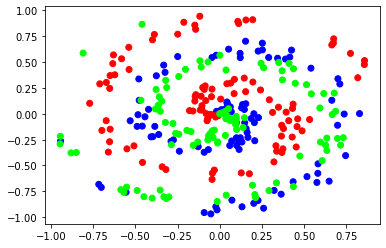

In [7]:
# Pintar cada classe com uma cor
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

# Mostrar o gráfico
plt.show()

Mantenha em mente que uma rede neural não saberá a diferença entre as cores, pois não há a informação de classes. Isso é feito apenas para fins didáticos. Nos dados acima, cada ponto é um feature e suas coordenadas são as amostras que formam o conjunto de dados. A "classificação" desse ponto tem a ver com a espiral de qual ele faz parte, representada pela cor azul, verde ou vermelha no gráfico acima. Essas cores seriam atribuídas a um número de classe para o modelo se ajustar, como 0, 1 e 2.

# Classe de Camada Densa

Agora não precisamos escrever os nossos dados na mão, devemos criar algo similar que as redes naurais usam. Usaremos algo que chamamos de **camada densa** ou **camada totalmente conectada**. Essas camadas são geralmente chamadas de *densas* nos artigos, código e livros, mas você pode encontrar também o termos *totalmente conectada* ou simplesmente "*fc*". Nossa camada densa começa com dois métodos:

In [3]:
class CamadaDensa:
    def __init__(self, n_entradas, n_neuronios):
        """Inicializar os pesos e as biases"""
        pass

    def forward(self, entradas):
        """Calcular as saídas a partir das entradas, pesos e biases"""
        pass

Como vimos nos capítulos anteriores, os pesos frequentemente são selecionados de modo aleatório, mas nem sempre. Se você deseja carregar um modelo pré-treinado, você o inicializará com os parâmetros que começaram o treino. Isso é possível, desde que não seja um novo modelo para treino, você pode usar valores aleatórios para a inicialização. Por agora, vamos usar a aleatoriedade para os pesos. Temos também a função **forward()**. Quando passamos os dados para um modelo do começo até o final (entradas até a saída), o processo recebe o nome de **forward pass**. Mas como você pode imaginar, essa não é a única forma de fazer as coisas. Você pode ter um loop nos dados para ir da saída e voltar para a entrada, por exemplo. Mas por agora vamos aprender o jeito mais simple e fácil que é o forward pass.

Vamos continuar escrevendo  classe ***CamadaDensa*** com os pesos e biases inicias de modo aleatório:

In [11]:
class CamadaDensa:
    def __init__(self, n_entradas, n_neuronios):
        """Inicializar os pesos e as biases"""
        self.pesos = 0.01 * np.random.randn(n_entradas, n_neuronios)
        self.biases = np.zeros((1, n_neuronios))

    def forward(self, entradas):
        """Calcular as saídas a partir das entradas, pesos e biases"""
        pass

Aqui, configuramos os pesos com números aleatórios e as biases com valor zero. Observe que inicializamos os pesos com **(n_entradas, n_neuronios)** ao invés de **(n_neuronios, n_entradas)**. Fizemos isso para que o método não realize a transposição toda vez que a função for chamada. Mas por que as biases possuem valor zero? Em cenários específicos, como em conjuntos de dados que possuem valores 0, um bias pode ativar um neurônios de imediato. Algumas vezes é apropriado iniciar as biases com números que não seja zero, mas geralmente as biases começam com zero. De qualquer modo, nesse notebook, você terá sucesso em usar biases direfentes de zero. Isso dependerá da aplicação da rede neural e das coisas que você pode fazer para melhorar os resultados. Uma situação onde você poderá tentar algo semelhante a isso é chamado de **neurônios mortros**. Ainda não vimos funções de ativação na prática, mas imagine a nossa função degrau novamente:

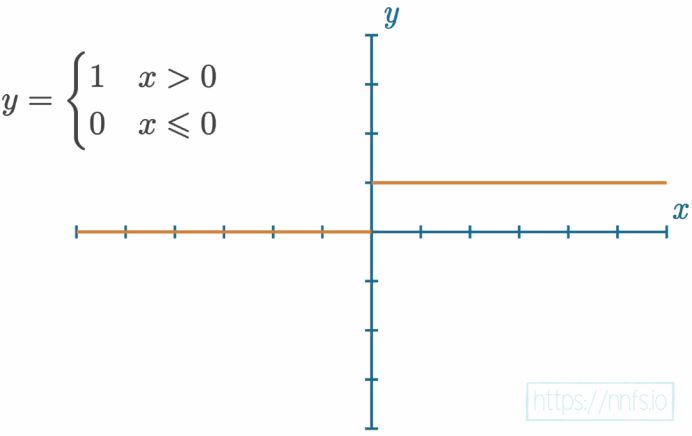

***Figura 3.5***: Gáfico da função degrau.

É possível que a equação *pesos x entradas + biases* não encontrar o limite para a função degrau, o que indica que a saída do neurônio será 0. Isso não é um grande problema para um dados de entrada, mas se todas as entradas o valor de saída for 0 torna-se um problema. Não podemos esquecer que nas camadas ocultas a saída de um neurônio é a entrada de outro, logo se a entrda da camada seguinte for 0, o peso do neurônio multiplicado por 0 é 0. Com o aumento dos neurônios retornando 0 como saída, mais entrdas dos próximos neurônios serão 0s, deixando a rede sem conseguir treinar, ou "morta".

Vamos explorar **np.random.randn()** e **np.zeros()** com mais detalhes. Esses métodos são convenientes para utilizar arrays. **np.random.randn()** produz uma distribuição Gausiao com a média 0 e variância de 1, o que indica que os números gerados aleatoriamente, positivos e negativos, ficam ao redor de 0 e a média perto de 0. De modo geral, redes neurais trabalham melhor com valores entre -1 e +1, que discutiremos nos próximos capítulos. Em suma, a função **np.random.randn()** gera números aleatórios em torno desse intervalo. O que fazemos é multiplicar essa distribuição Gaussiano pelo peso de 0.01 para gerar números de baixa magnitude. Diminuir a magnitude também diminui o tempo de treino do modelo, uma vez que intervalos exageradamente largos demoram mais tempo para que a rede entenda o que é e os use no treino. A ideia aqui é iniciar um modelo com valores pequenos diferentes de 0 que não afetem o treinamento. Desse modo, temos um conjunto de valores para começar a trabalhar, mas felizmente não tão grande os intervalos nem zeros. Se você quiser, pode usar outros valores além de 0.01.

Finalmente, a função **np.random.randn()** pegas as dimensões informadas e cria um array de saída no shape das diemsões. Os pesos aqui terão o shape da quantidade de entrdadas na 1ª dimensão e a quantidade de neurônios na 2ª dimensão. Isso é similar ao array que fizemos anteriormente na mão, só que agora gerados aleatoriamente. Se você são souber ou tiver curiosidade de saber como o código funciona, dê um **print()** no array:

In [1]:
# Importar a biblioteca
import numpy as np

# Mostrar o array
print(np.random.randn(2, 5))

[[-0.74614435 -0.84516724 -2.27766509  0.19504405 -0.72932178]
 [ 0.25133054  0.51566047  2.45217799 -0.27697832 -1.47324641]]


Nesse exemplo, a função retorna um array 2x5 com os dados aleatórios de uma distribuição Gaussiana com média 0.

A função **no.zeros()** cria um array com zeros com um shape desejado:

In [3]:
# Mostrar o array
print(np.zeros((2, 5)))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Vamos inicializar as biases com o shape (1, n_neuronios), como um vetor de linha, que adicionaremos ao resultado do produto escalar posteriormente, sem operações adicionais como a transposição.

Veja um exemplo de como a nossa classe inicializa os pesos e biases:

In [5]:
# Importar a biblioteca
import numpy as np

# Informar a quantidade de entradas e neurônios
n_entradas = 2
n_neuronios = 4

# Configurar os pesos e biases
pesos = 0.01 * np.random.randn(n_entradas, n_neuronios)
biases = np.zeros((1, n_neuronios))

# Ver os arrays dos pesos e biases
print('Pesos:')
print(pesos)
print('\n')
print('Biases:')
print(biases)

Pesos:
[[-0.00710455  0.00449061  0.01914867 -0.00315361]
 [ 0.01665941  0.00782657 -0.02126581  0.0102933 ]]


Biases:
[[0. 0. 0. 0.]]


Colocando isso no método **forward()** da nossa classe ***CamadaDensa***:

In [6]:
class CamadaDensa:
    def __init__(self, n_entradas, n_neuronios):
        """Inicializar os pesos e as biases"""
        self.pesos = 0.01 * np.random.randn(n_entradas, n_neuronios)
        self.biases = np.zeros((1, n_neuronios))

    def forward(self, entradas):
        """Calcular as saídas a partir das entradas, pesos e biases"""
        self.saida = np.dot(entradas, self.pesos) + self.biases

Nós agora estamos prontos para colocar a nossa classe em prática para nos poupar o trabalho de escrever todas as entradas, pesos e biases na mão.

Colocando tudo em uma só célula de código, temos:

In [7]:
# Importar as bibliotecas
import nnfs
import numpy as np
from nnfs.datasets import spiral_data

# Iniciar o nnfs
nnfs.init()


# Classe da camada densa
class CamadaDensa:
    def __init__(self, n_entradas, n_neuronios):
        """Inicializar os pesos e as biases"""
        self.pesos = 0.01 * np.random.randn(n_entradas, n_neuronios)
        self.biases = np.zeros((1, n_neuronios))

    def forward(self, entradas):
        """Calcular as saídas a partir das entradas, pesos e biases"""
        self.saida = np.dot(entradas, self.pesos) + self.biases
        

# Criar o conjunto de dados
X, y = spiral_data(samples=100, classes=3)

# Criar a camada densa com 2 entradas e 3 valores de saída
camada_densa = CamadaDensa(2, 3)

# Realizar os cálculos com a função "forward()"
camada_densa.forward(X)

# Ver a saída das 5 primeiras amostras
print(camada_densa.saida[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


Na saída apresentada, podemos ver que temos 5 linhas e 3 valores em cada linha. Cada um desses 3 valores é um valor vindo dos 3 neurônios da camada *camada_densa* depois de passar cada uma das amostras. Isso é ótimo! Temos uma rede de neurônios, então nosso modelo de rede neural está quase ganhando forma, mas antes precisamos estudar as funções de ativação. É o que faremos no próximo capítulo!

Para códigos, recursos e errata do capítulo:

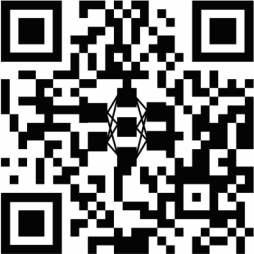

***Material suplementar***: https://nnfs.io/ch3